In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\sukha\Downloads\DATA_SCIENCE\DATASET\Cleaned_DATA.csv")

In [3]:
# --- 1. Drop Columns ---
# Drop 'Country' (constant) and 'Month' (high missing values)
df = df.drop(columns=['Country', 'Month'])

In [4]:
# --- 2. Define Features (X) and Target (y) ---
target_column = 'Reservoir_Water_Storage_BCM'
y = df[target_column]
X = df.drop(columns=[target_column])

In [5]:
# --- 3. Handle Categorical Features (One-Hot Encoding) ---
categorical_cols = ['State', 'District', 'Reservoir Basin Name', 'Reservoir Name']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [6]:
# --- 4. Split Data ---
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Data Preparation Complete. X_train shape: {X_train.shape}")

Data Preparation Complete. X_train shape: (42900, 584)


In [7]:
# --- 1. Initialize Model ---
# Initialize the Random Forest Regressor
# We use 100 trees (n_estimators=100) as a default starting point.
random_forest_model = RandomForestRegressor(
    n_estimators=100, 
    random_state=42, 
    n_jobs=-1  # Use all available CPU cores for faster training
)

print("Starting Random Forest Model Training...")

Starting Random Forest Model Training...


In [8]:
# --- 2. Train Model ---
# Train the model using the training data
random_forest_model.fit(X_train, y_train)

print("Random Forest Regressor Model training complete.")

Random Forest Regressor Model training complete.


In [9]:
# Optional: Examine Feature Importance
# Random Forest provides a measure of how much each feature contributed to the prediction.
feature_importances = pd.Series(
    random_forest_model.feature_importances_, 
    index=X_train.columns
).sort_values(ascending=False)

print("\nTop 5 Feature Importances:")
print(feature_importances.head())


Top 5 Feature Importances:
Reservoir_Water_Level_M             0.355623
Full_Reservoir_Capacity_BCM         0.332161
Reservoir Name_Ukai Reservoir       0.068221
State_Madhya Pradesh                0.052136
Reservoir Name_Hirakud Reservoir    0.027696
dtype: float64


In [10]:
# --- 1. Make Predictions ---
# Predict the reservoir water storage on the test set
y_pred = random_forest_model.predict(X_test)


In [11]:

# --- 2. Calculate Evaluation Metrics ---
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


In [12]:

# --- 3. Display Results ---
print("--- Random Forest Regressor Model Evaluation ---")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R^2): {r2:.4f}")

# Optional: Compare Random Forest to Linear Regression R-squared (assuming Linear Regression R^2 was previously calculated)
# You should see a significant improvement in R^2 here compared to the simple Linear Regression model.

--- Random Forest Regressor Model Evaluation ---
Mean Absolute Error (MAE): 0.0055
Mean Squared Error (MSE): 0.0033
Root Mean Squared Error (RMSE): 0.0573
R-squared (R^2): 0.9919


C:\Users\sukha\AppData\Local\Temp\ipykernel_8368\2338510642.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette='Blues_r')


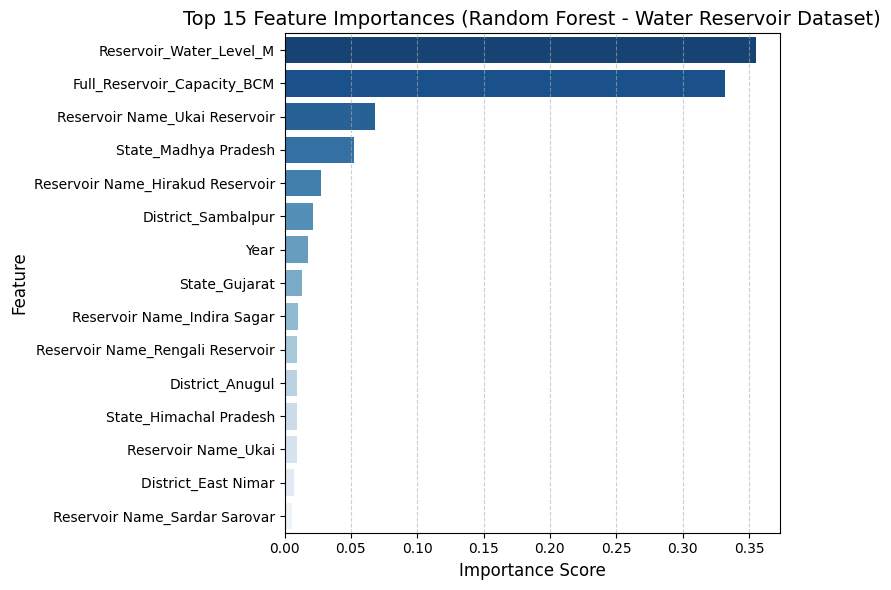

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Get feature importances
importances = random_forest_model.feature_importances_
feature_names = X_train.columns

feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Only take top 15 for visualization
top_features = feat_imp.head(15)

plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='Blues_r')
plt.title('Top 15 Feature Importances (Random Forest - Water Reservoir Dataset)', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
